# DATA EXPLORATION 

In [42]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [43]:
bodyperformance = pd.read_csv ('bodyPerformance.csv')
bodyperformance.shape
bodyperformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [44]:
bodyperformance.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [46]:
bodyperformance["gender"].value_counts()

gender
M    8467
F    4926
Name: count, dtype: int64

In [47]:
bodyperformance["class"].value_counts()

class
C    3349
D    3349
A    3348
B    3347
Name: count, dtype: int64

In [48]:
# convert gender to int
gender_mapping = {'M': 0, 'F': 1}
bodyperformance['gender'] = bodyperformance['gender'].map(gender_mapping)

In [49]:
# convert class to int
class_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
bodyperformance['class'] = bodyperformance['class'].map(class_mapping)

In [50]:
bodyperformance.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [51]:
bodyperformance.corr()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
age,1.000000,0.060229,-0.293980,-0.099966,0.242302,0.158508,0.211167,-0.179583,-0.070033,-0.544581,-0.435172,0.065612
gender,0.060229,1.000000,-0.730899,-0.672887,0.551407,-0.228552,-0.323921,-0.800184,0.327467,-0.474596,-0.704149,-0.075605
height_cm,-0.293980,-0.730899,1.000000,0.734909,-0.515440,0.145933,0.210186,0.735024,-0.221970,0.500424,0.674589,0.037753
weight_kg,-0.099966,-0.672887,0.734909,1.000000,-0.084065,0.262317,0.338943,0.700119,-0.296249,0.294899,0.479564,0.214129
body fat_%,0.242302,0.551407,-0.515440,-0.084065,1.000000,0.048059,-0.030376,-0.541788,-0.071225,-0.608912,-0.673273,0.341956
diastolic,0.158508,-0.228552,0.145933,0.262317,0.048059,1.000000,0.676309,0.202062,-0.072098,0.016547,0.097243,0.066761
systolic,0.211167,-0.323921,0.210186,0.338943,-0.030376,0.676309,1.000000,0.286012,-0.082434,0.056276,0.152894,0.035484
gripForce,-0.179583,-0.800184,0.735024,0.700119,-0.541788,0.202062,0.286012,1.000000,-0.112577,0.576669,0.746853,-0.136088
sit and bend forward_cm,-0.070033,0.327467,-0.221970,-0.296249,-0.071225,-0.072098,-0.082434,-0.112577,1.000000,0.177153,0.026487,-0.588123
sit-ups counts,-0.544581,-0.474596,0.500424,0.294899,-0.608912,0.016547,0.056276,0.576669,0.177153,1.000000,0.748273,-0.452832


In [54]:
bodyperformance ['height_m'] = bodyperformance['height_cm'] / 100
bodyperformance['BMI'] = bodyperformance['weight_kg'] / (bodyperformance['height_m']**2)
bodyperformance['broad jump_m'] = bodyperformance['broad jump_cm'] / 100
bodyperformance['sit and bend forward_m'] = bodyperformance['sit and bend forward_cm'] / 100

bodyperformance.drop(columns=['height_cm', 'broad jump_cm', 'sit and bend forward_cm', 'systolic', 'diastolic'], axis=1, inplace=True)

print(bodyperformance.head())

    age  gender  weight_kg  body fat_%  gripForce  sit-ups counts  class  \
0  27.0       0      75.24        21.3       54.9            60.0      2   
1  25.0       0      55.80        15.7       36.4            53.0      0   
2  31.0       0      78.00        20.1       44.8            49.0      2   
3  32.0       0      71.10        18.4       41.4            53.0      1   
4  28.0       0      67.70        17.1       43.5            45.0      1   

   height_m        BMI  broad jump_m  sit and bend forward_m  
0     1.723  25.344179          2.17                   0.184  
1     1.650  20.495868          2.29                   0.163  
2     1.796  24.181428          1.81                   0.120  
3     1.745  23.349562          2.19                   0.152  
4     1.738  22.412439          2.17                   0.271  


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'weight_kg'}>],
       [<Axes: title={'center': 'body fat_%'}>,
        <Axes: title={'center': 'gripForce'}>,
        <Axes: title={'center': 'sit-ups counts'}>],
       [<Axes: title={'center': 'class'}>,
        <Axes: title={'center': 'height_m'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'broad jump_m'}>,
        <Axes: title={'center': 'sit and bend forward_m'}>, <Axes: >]],
      dtype=object)

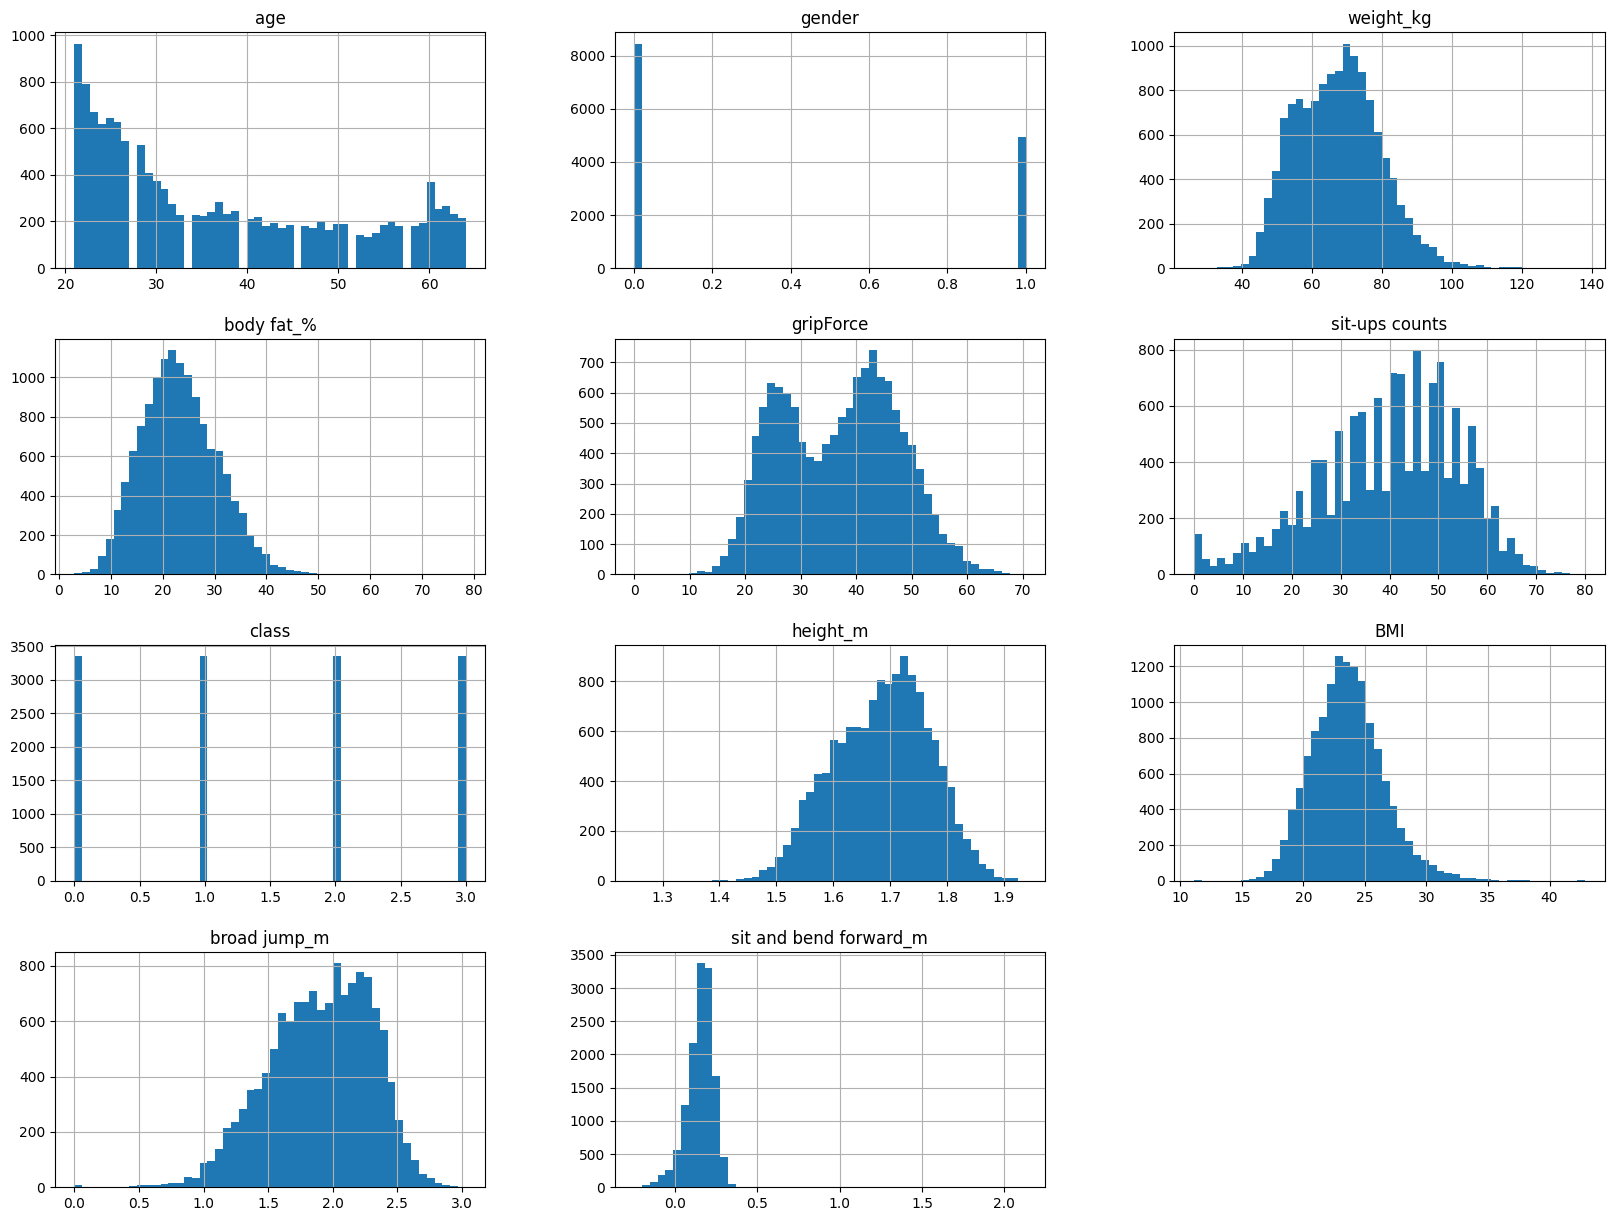

In [55]:
bodyperformance.hist(bins=50, figsize=(20,15))

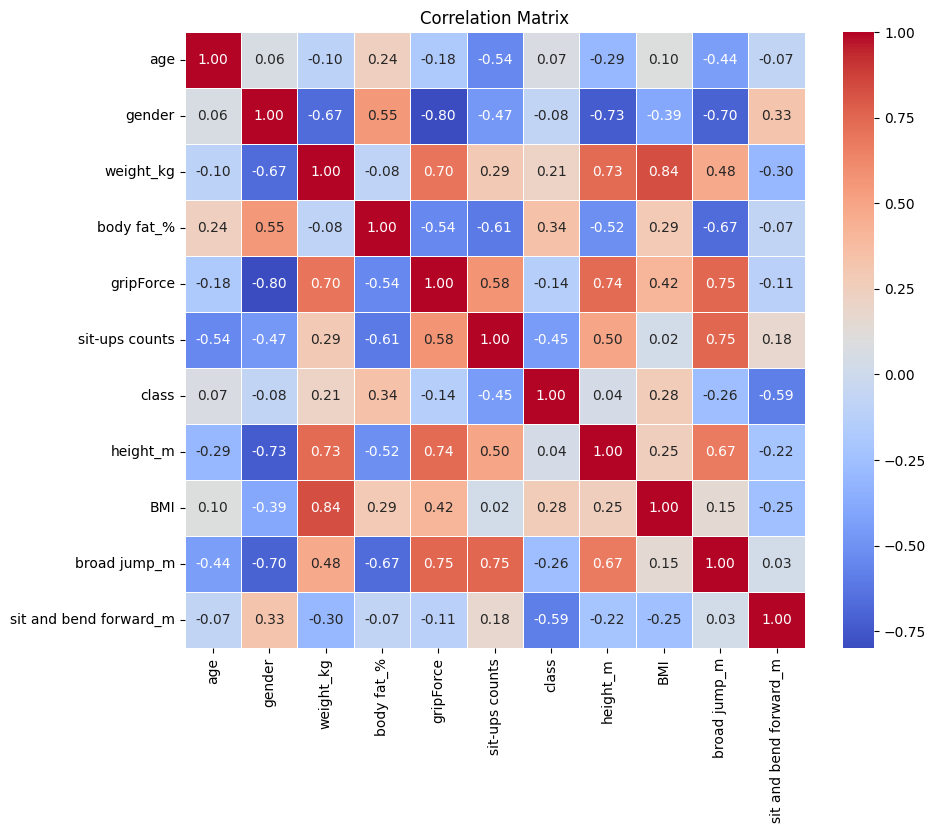

In [56]:
correlation_matrix = bodyperformance.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

In [57]:
bodyperformance.corr()

,age,gender,weight_kg,body fat_%,gripForce,sit-ups counts,class,height_m,BMI,broad jump_m,sit and bend forward_m
age,1.000000,0.060229,-0.099966,0.242302,-0.179583,-0.544581,0.065612,-0.293980,0.098705,-0.435172,-0.070033
gender,0.060229,1.000000,-0.672887,0.551407,-0.800184,-0.474596,-0.075605,-0.730899,-0.389513,-0.704149,0.327467
weight_kg,-0.099966,-0.672887,1.000000,-0.084065,0.700119,0.294899,0.214129,0.734909,0.836657,0.479564,-0.296249
body fat_%,0.242302,0.551407,-0.084065,1.000000,-0.541788,-0.608912,0.341956,-0.515440,0.288427,-0.673273,-0.071225
gripForce,-0.179583,-0.800184,0.700119,-0.541788,1.000000,0.576669,-0.136088,0.735024,0.415566,0.746853,-0.112577
sit-ups counts,-0.544581,-0.474596,0.294899,-0.608912,0.576669,1.000000,-0.452832,0.500424,0.022702,0.748273,0.177153
class,0.065612,-0.075605,0.214129,0.341956,-0.136088,-0.452832,1.000000,0.037753,0.275152,-0.262154,-0.588123
height_m,-0.293980,-0.730899,0.734909,-0.515440,0.735024,0.500424,0.037753,1.000000,0.250376,0.674589,-0.221970
BMI,0.098705,-0.389513,0.836657,0.288427,0.415566,0.022702,0.275152,0.250376,1.000000,0.151675,-0.249469
broad jump_m,-0.435172,-0.704149,0.479564,-0.673273,0.746853,0.748273,-0.262154,0.674589,0.151675,1.000000,0.026487


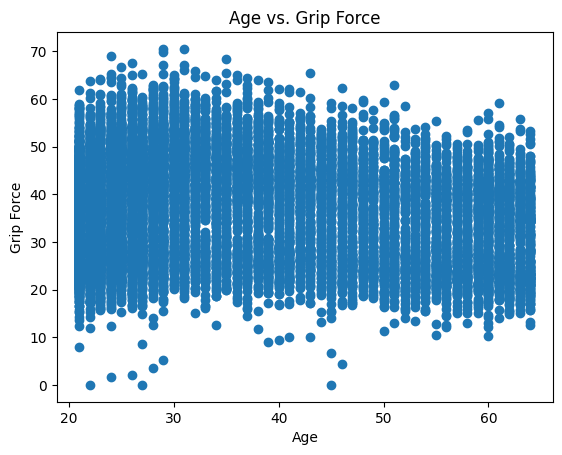

In [58]:
# Scatter plot of age vs. gripForce
plt.scatter(bodyperformance['age'], bodyperformance['gripForce'])
plt.xlabel('Age')
plt.ylabel('Grip Force')
plt.title('Age vs. Grip Force')
plt.show()

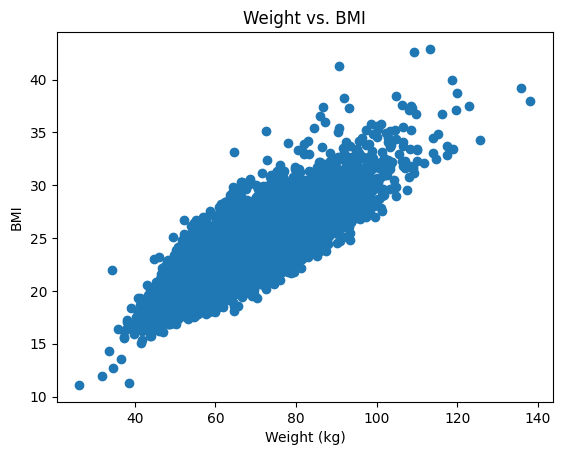

In [59]:
# Scatter plot of weight_kg vs. BMI
plt.scatter(bodyperformance['weight_kg'], bodyperformance['BMI'])
plt.xlabel('Weight (kg)')
plt.ylabel('BMI')
plt.title('Weight vs. BMI')
plt.show()

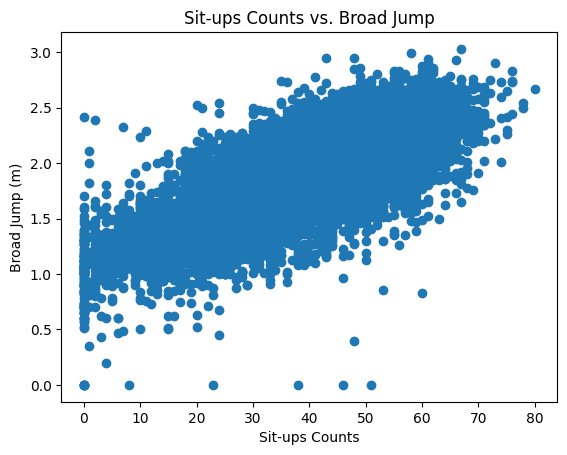

In [60]:
# Scatter plot of sit-ups counts vs. broad jump_m
plt.scatter(bodyperformance['sit-ups counts'], bodyperformance['broad jump_m'])
plt.xlabel('Sit-ups Counts')
plt.ylabel('Broad Jump (m)')
plt.title('Sit-ups Counts vs. Broad Jump')
plt.show()